# Ingénierie des caractéristiques I

### Création du `DataFrame` avec les nouvelles données

- Distance du filet
- Angle relatif au filet
- est un but (0 ou 1)
- Filet vide (0 ou 1, vous pouvez supposons que les NaN sont 0)

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Go up one level to `project` directory

In [3]:
import data.shots_data_retriever as shots_data_retriever
import importlib

importlib.reload(shots_data_retriever)

<module 'data.shots_data_retriever' from '/Users/nathan/Documents/UdeM/ift6758/ift6758_projet/ift6758/data/shots_data_retriever.py'>

In [44]:
shotsDataRetriever = shots_data_retriever.ShotsDataRetriever()


In [ ]:
df = shotsDataRetriever.get_df_for_milestone2_part4()
df

          game_id  period time_in time_remaining  team_id  is_goal  x_coord  \
0      2016020001       1   01:11          18:49       10        0     77.0   
1      2016020001       1   02:53          17:07        9        0     86.0   
2      2016020001       1   04:01          15:59        9        0     23.0   
3      2016020001       1   04:46          15:14        9        0     33.0   
4      2016020001       1   06:46          13:14       10        0     34.0   
...           ...     ...     ...            ...      ...      ...      ...   
68495  2019021082       3   16:45          03:15        9        0     77.0   
68496  2019021082       3   17:20          02:40       26        0     76.0   
68497  2019021082       3   17:22          02:38       26        0     79.0   
68498  2019021082       3   18:50          01:10        9        0     81.0   
68499  2019021082       3   19:39          00:21        9        0     67.0   

       y_coord     shooter_name        goalie_name 

### Visualisations

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("pastel")
sns_palette = sns.color_palette(palette='RdYlGn')

#### Histogramme de tirs (binned par distance)

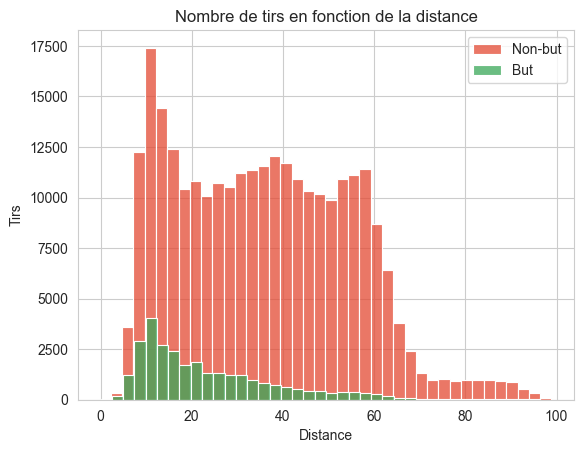

In [20]:
sns.histplot(df[df['is_goal'] == 0]['distance'], binwidth=2.5, color=sns_palette[0], label='Non-but', kde=False)
sns.histplot(df[df['is_goal'] == 1]['distance'], binwidth=2.5, color=sns_palette[5], label='But', kde=False)

plt.title('Nombre de tirs en fonction de la distance')
plt.xlabel('Distance')
plt.ylabel('Tirs')
plt.legend()
plt.show()

#### Histogramme de tirs (binned par angle)

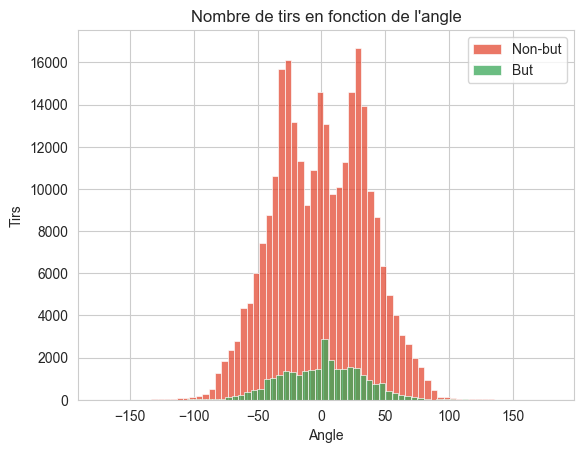

In [21]:
sns.histplot(df[df['is_goal'] == 0]['angle_to_goal'], binwidth=5, color=sns_palette[0], label='Non-but', kde=False)
sns.histplot(df[df['is_goal'] == 1]['angle_to_goal'], binwidth=5, color=sns_palette[5], label='But', kde=False)

plt.title('Nombre de tirs en fonction de l\'angle')
plt.xlabel('Angle')
plt.ylabel('Tirs')
plt.legend()
plt.show()

#### Histogramme de tirs (binned par angle)

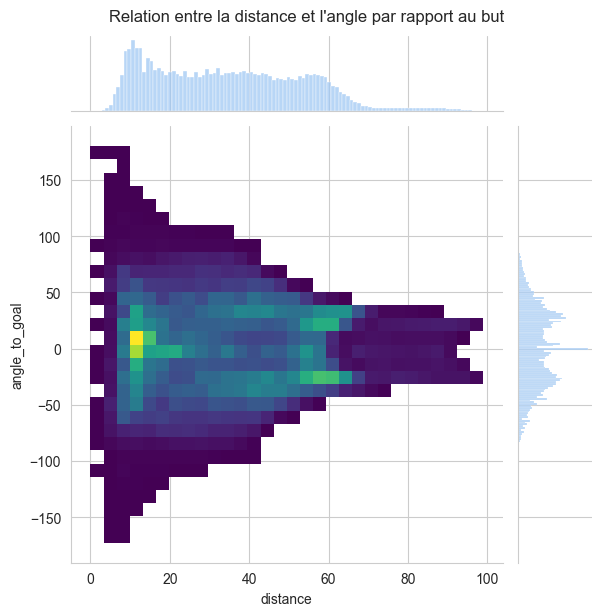

In [22]:
df = df.reset_index()
sns.jointplot(data=df, x='distance', y='angle_to_goal', kind='hist', bins=30, cmap='viridis')
plt.suptitle("Relation entre la distance et l'angle par rapport au but", y=1.02)
plt.show()

#### Taux de but

1. Taux de but en fonction de la distance du tir

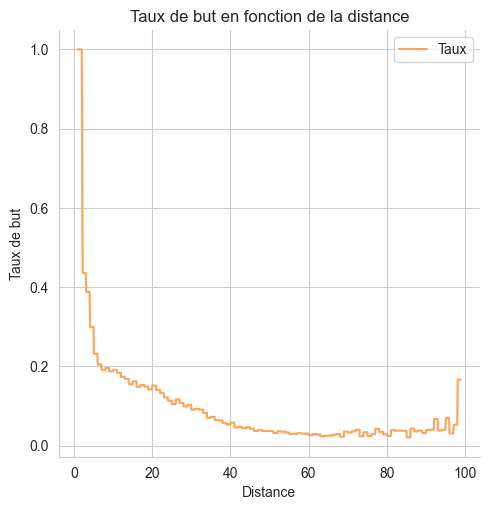

In [23]:
bins = list(range(0, 101, 1))
cdf = df.copy()

cdf['distance_bin'] = pd.cut(cdf['distance'], bins)

# Calculate the goal rate for each bin
goal_rate_by_bin = cdf.groupby('distance_bin', observed=False)['is_goal'].mean()

# Join back with original data to add goal rate for each row
cdf = cdf.merge(goal_rate_by_bin.rename('goal_rate'), on='distance_bin')

sns.relplot(cdf, x='distance', y='goal_rate', color=sns_palette[1], kind='line', label='Taux')

plt.title('Taux de but en fonction de la distance')
plt.xlabel('Distance')
plt.ylabel('Taux de but')
plt.legend()
plt.show()

1. Taux de but en fonction de l'angle

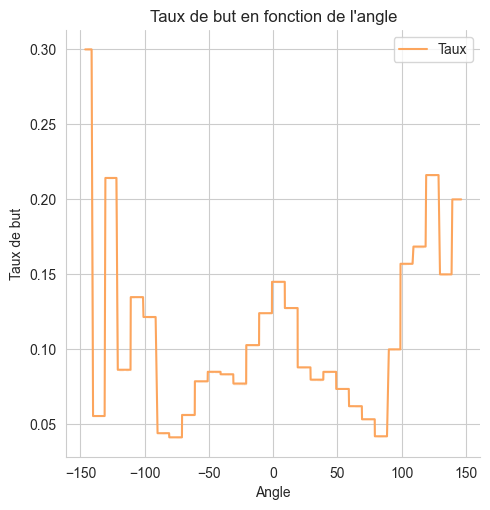

In [24]:
bins = list(range(-151, 151, 10))
cdf = df.copy()

cdf['angle_bin'] = pd.cut(cdf['angle_to_goal'], bins)

# Calculate the goal rate for each bin
goal_rate_by_bin = cdf.groupby('angle_bin', observed=False)['is_goal'].mean()

# Join back with original data to add goal rate for each row
cdf = cdf.merge(goal_rate_by_bin.rename('goal_rate'), on='angle_bin')

sns.relplot(cdf, x='angle_to_goal', y='goal_rate', color=sns_palette[1], kind='line', label='Taux')

plt.title('Taux de but en fonction de l\'angle')
plt.xlabel('Angle')
plt.ylabel('Taux de but')
plt.legend()
plt.show()

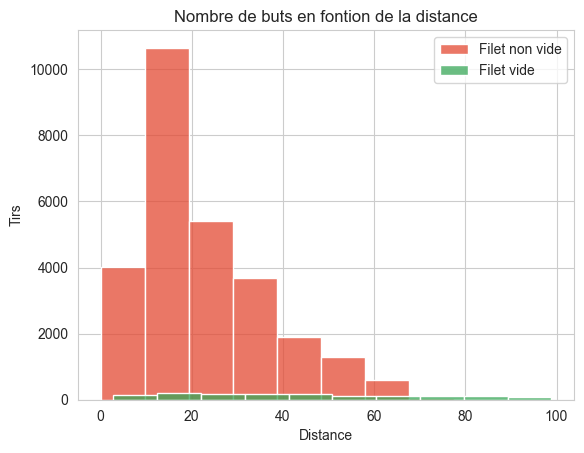

In [25]:
goals_df = df.copy()
goals_df = goals_df[goals_df['is_goal'] == 1]

sns.histplot(goals_df[goals_df['is_empty_net'] == 0]['distance'], binwidth=10, color=sns_palette[0], label='Filet non vide', kde=False)
sns.histplot(goals_df[goals_df['is_empty_net'] == 1]['distance'], binwidth=10, color=sns_palette[5], label='Filet vide', kde=False)
 
plt.title('Nombre de buts en fontion de la distance')
plt.xlabel('Distance')
plt.ylabel('Tirs')
plt.legend()
plt.show()

### Détection d'événements à caractéristiques incorrectes

In [43]:
import requests
import json

detect_df = df.copy()

# Filter rows where is_empty_net is 1 and is_goal is 0
empty_net_no_goal = detect_df[(detect_df['is_empty_net'] == 1) & (detect_df['is_goal'] == 1)]

print(empty_net_no_goal[['game_id', 'is_goal', 'is_empty_net']])

# 2016020002

response = requests.get(f'https://api-web.nhle.com/v1/gamecenter/2016020002/play-by-play')
data = response.json()
with open('data.json', 'w') as f:
    json.dump(data, f)

           game_id  is_goal  is_empty_net
119     2016020002        1             1
120     2016020002        1             1
187     2016020003        1             1
361     2016020006        1             1
510     2016020008        1             1
...            ...      ...           ...
304284  2019021058        1             1
304530  2019021062        1             1
304830  2019021067        1             1
305153  2019021072        1             1
305688  2019021080        1             1

[1388 rows x 3 columns]
